# Tarea 2
## Regresion Lineal y Logistica 

### DataSet
* dataset de vuelos de argentina
* url: https://datos.gob.ar/dataset/transporte-aterrizajes-despegues-procesados-por-administracion-nacional-aviacion-civil-anac
* Seleccionar solo un año


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import numpy as np


   Fecha UTC  Hora UTC Clase de Vuelo (todos los vuelos) Clasificación Vuelo  \
0 2023-01-01  00:01:00                           Regular       Internacional   
1 2023-01-01  00:10:00                           Regular           Doméstico   
2 2023-01-01  00:15:00                           Regular       Internacional   
3 2023-01-01  00:17:00                           Regular           Doméstico   
4 2023-01-01  00:19:00                           Regular           Doméstico   

  Tipo de Movimiento Aeropuerto Origen / Destino  \
0         Aterrizaje        EZE             LEMD   
1           Despegue        IGU              EZE   
2         Aterrizaje        AER             SBPA   
3         Aterrizaje        SAL              AER   
4         Aterrizaje        AER              OSA   

                   Aerolinea Nombre          Aeronave  Pasajeros  PAX  \
0  IBERIA - LINEAS AÉREAS DE ESPAÑA                 0        199  199   
1            JETSMART AIRLINES S.A.      AIB-A320-232       

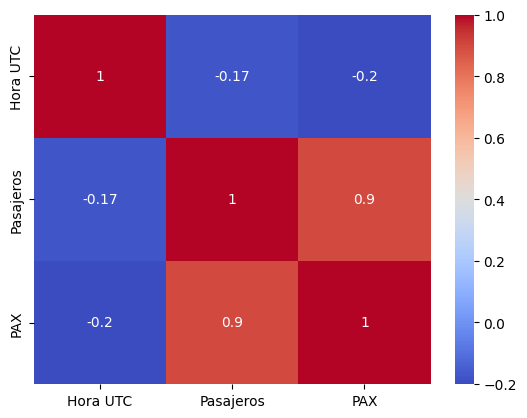

Error cuadrático medio (MSE): 672.3651198277457
Precisión del modelo de clasificación: 0.9806601781204785


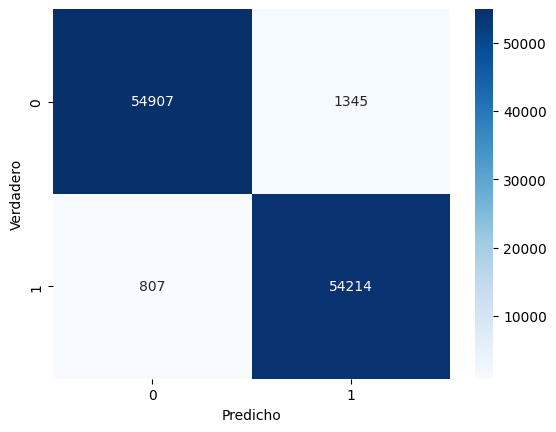

Tipo de Movimiento   Aterrizaje  Despegue
Clasificación Vuelo                      
Doméstico                225758    228780
Internacional             50137     51688


In [7]:
# Cargar el dataset desde un archivo Excel
file_path = 'Dataset/2023-2.xlsx'  # Cambia esta ruta al archivo correcto si es necesario
vuelos_argentina = pd.read_excel(file_path)

# Mostrar una vista previa del dataset
print(vuelos_argentina.head())

# Convertir 'Fecha UTC' a datetime y 'Hora UTC' a timedelta
vuelos_argentina['Fecha UTC'] = pd.to_datetime(vuelos_argentina['Fecha UTC'])

# Convertir 'Hora UTC' a timedelta
vuelos_argentina['Hora UTC'] = vuelos_argentina['Hora UTC'].apply(lambda x: pd.Timedelta(hours=x.hour, minutes=x.minute))

# Sumar 'Fecha UTC' y 'Hora UTC' para tener una columna completa de datetime
vuelos_argentina['Fecha Hora'] = vuelos_argentina['Fecha UTC'] + vuelos_argentina['Hora UTC']

# Seleccionar solo los datos del año 2023
vuelos_2023 = vuelos_argentina[vuelos_argentina['Fecha Hora'].dt.year == 2023]

# Análisis y Descripción de los Datos
print(vuelos_2023.describe())
print(vuelos_2023.info())

# Limpiar los datos (manejar valores faltantes, duplicados, etc.)
vuelos_2023.dropna(inplace=True)
vuelos_2023.drop_duplicates(inplace=True)

# Seleccionar solo columnas numéricas para el análisis de correlación
numeric_columns = vuelos_2023.select_dtypes(include=[np.number])

# Análisis de correlación
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Selección de variables para la predicción (Regresión Lineal)
features = ['Pasajeros']  # Puedes agregar más características relevantes
target = 'PAX'

X = vuelos_2023[features]
y = vuelos_2023[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Modelo de Regresión Logística (clasificación)
# Transformar el target en una variable categórica binaria
vuelos_2023['PAX_Binario'] = (vuelos_2023['PAX'] > vuelos_2023['PAX'].median()).astype(int)
y_binario = vuelos_2023['PAX_Binario']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binario, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)

y_pred_class = log_reg.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred_class)
print(f'Precisión del modelo de clasificación: {accuracy}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_bin, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

# Tablas de Contingencia
contingency_table = pd.crosstab(vuelos_2023['Clasificación Vuelo'], vuelos_2023['Tipo de Movimiento'])
print(contingency_table)

## Petitorio

* Realizar un analisis y descripcion de los datos
* Limpiar los datos de ser necesario
* Realizar una prediccion utilizandon la regresion lineal
* Realizar una prediccion o clasificacion con el metodo de regresion logistica
* Para las predicciones puede utilizar las variables que el equipo seleccione
##### Investigacion -> sobre tablas de contingencia 

### Presentar

* Presentar un informe con capturas y conclusiones de los hallazgos
* conclusiones sobre los modelos entrenados(score,tablas de contingencias,mejor porcentaje de Dataset de entrenamiento y pruebas)
* Formato .pdf, incluir los nombres de los integrantes del grupo
